In [1]:
import os
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

import cubnm_paper

# set plots font and dpi
# Note: the font is not included in the repository
import matplotlib.font_manager
font_path = os.path.join(cubnm_paper.config.DATA_DIR, 'assets', 'Optima.ttc')
matplotlib.font_manager.fontManager.addfont(font_path)
font = matplotlib.font_manager.FontProperties(fname=font_path, size=12)
plt.rcParams.update({
    "font.family": font.get_name(),
    "figure.dpi": 600
})

Load grids:

In [2]:
grids = {}

for hardware in ['gpu', 'cpu']:
    grids[hardware] = cubnm_paper.data.load_grid(grid_shape=10, cpu_gpu_identity=True, hardware=hardware)

Mean absolute difference of GPU and CPU outputs for different simulated variables:

In [5]:
np.abs(grids['gpu'].problem.sim_group.sim_bold - grids['cpu'].problem.sim_group.sim_bold).mean()

6.828840302836962e-16

In [6]:
np.abs(grids['gpu'].problem.sim_group.sim_fc_trils - grids['cpu'].problem.sim_group.sim_fc_trils).mean()

1.2208278062631223e-15

In [7]:
np.abs(grids['gpu'].problem.sim_group.sim_fcd_trils - grids['cpu'].problem.sim_group.sim_fcd_trils).mean()

1.8947819054228254e-14

In [8]:
for state_var in grids['gpu'].problem.sim_group.state_names:
    print(
        state_var,
        np.abs(grids['gpu'].problem.sim_group.sim_states[state_var] - grids['cpu'].problem.sim_group.sim_states[state_var]).mean()
    )

I_E 2.0092091416549588e-16
I_I 3.6148972704097557e-17
r_E 6.177428771798309e-14
r_I 1.748636225632853e-14
S_E 9.489058589448942e-17
S_I 3.1481885552359366e-17


Grid plots:

/tmp/ipykernel_11676/110213711.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
/tmp/ipykernel_11676/110213711.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
/tmp/ipykernel_11676/110213711.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(ax.get_zticklabels(), fontsize=8)
/tmp/ipykernel_11676/110213711.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
/tmp/ipykernel_11676/110213711.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e

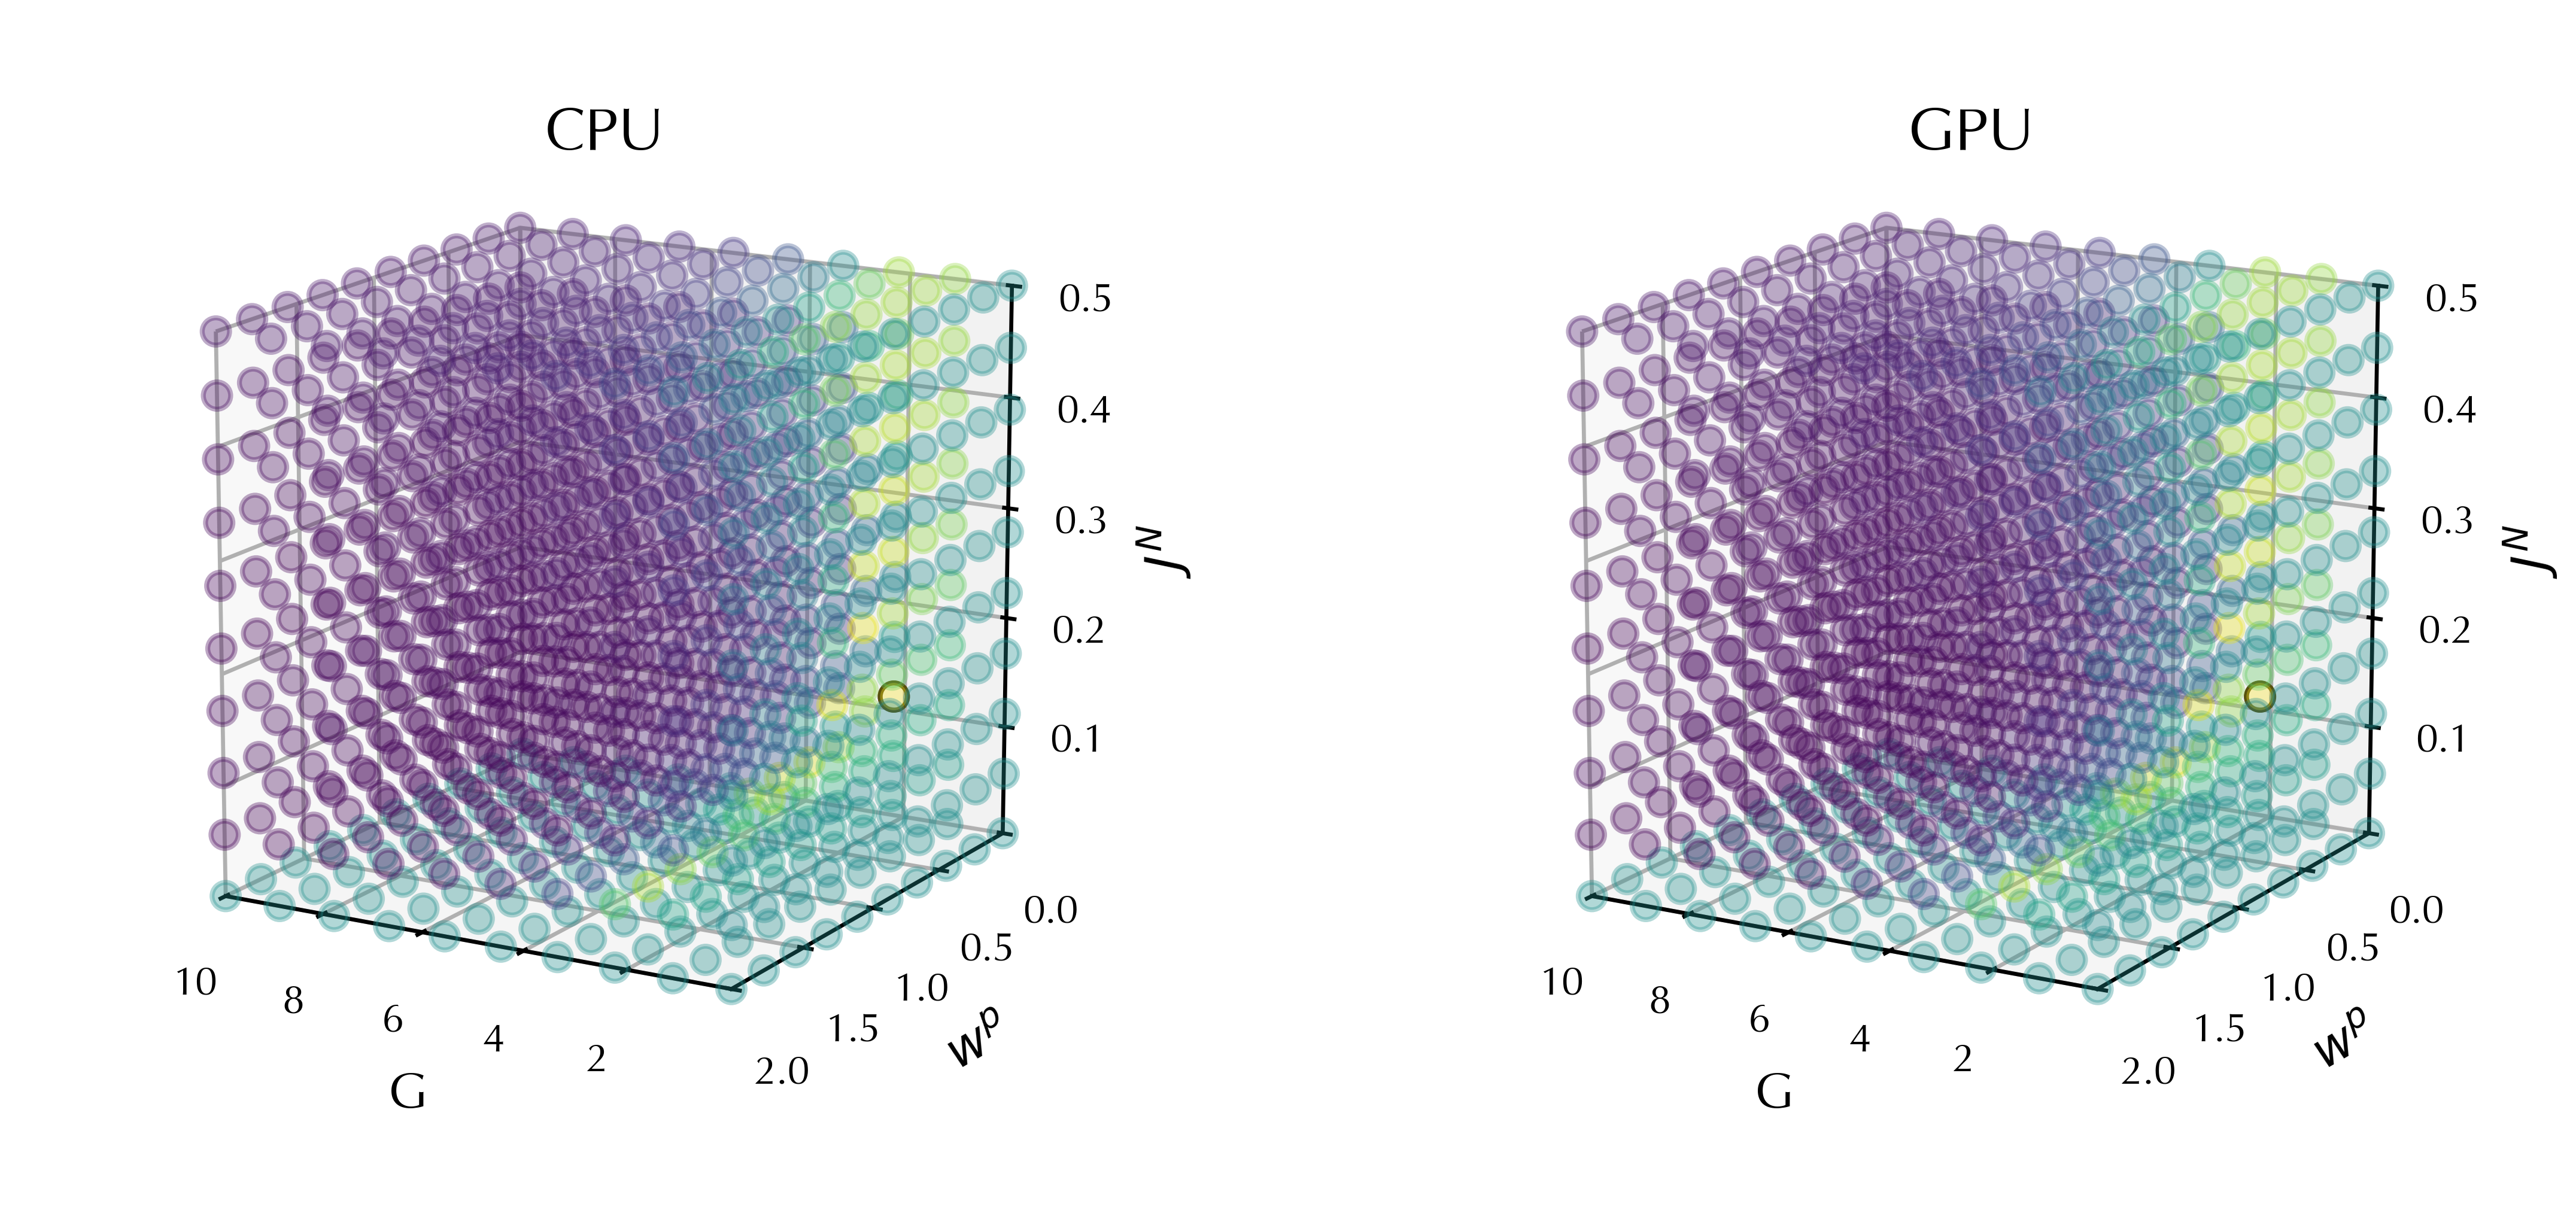

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(9, 4.5), subplot_kw={'projection': '3d'})
for i, hardware in enumerate(['cpu', 'gpu']):
    ax = axes[i]
    grids[hardware].plot_space('-cost', opt=True, config=dict(size=30, alpha=0.35, azim=120), ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=8)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=8)
    ax.set_zticklabels(ax.get_zticklabels(), fontsize=8)
    ax.set_title(hardware.upper(), y=0.95)
        
fig.tight_layout()
fig.savefig('S_cpu_gpu_identity_grid.png', transparent=True)

Correlation of grids (in figure caption):

In [68]:
scipy.stats.pearsonr(
    grids['cpu'].history.loc[:, 'cost'],
    grids['gpu'].history.loc[:, 'cost']
)

PearsonRResult(statistic=1.0, pvalue=0.0)

Identity of CPU and GPU output (simulated BOLD) in an example simulation and node:

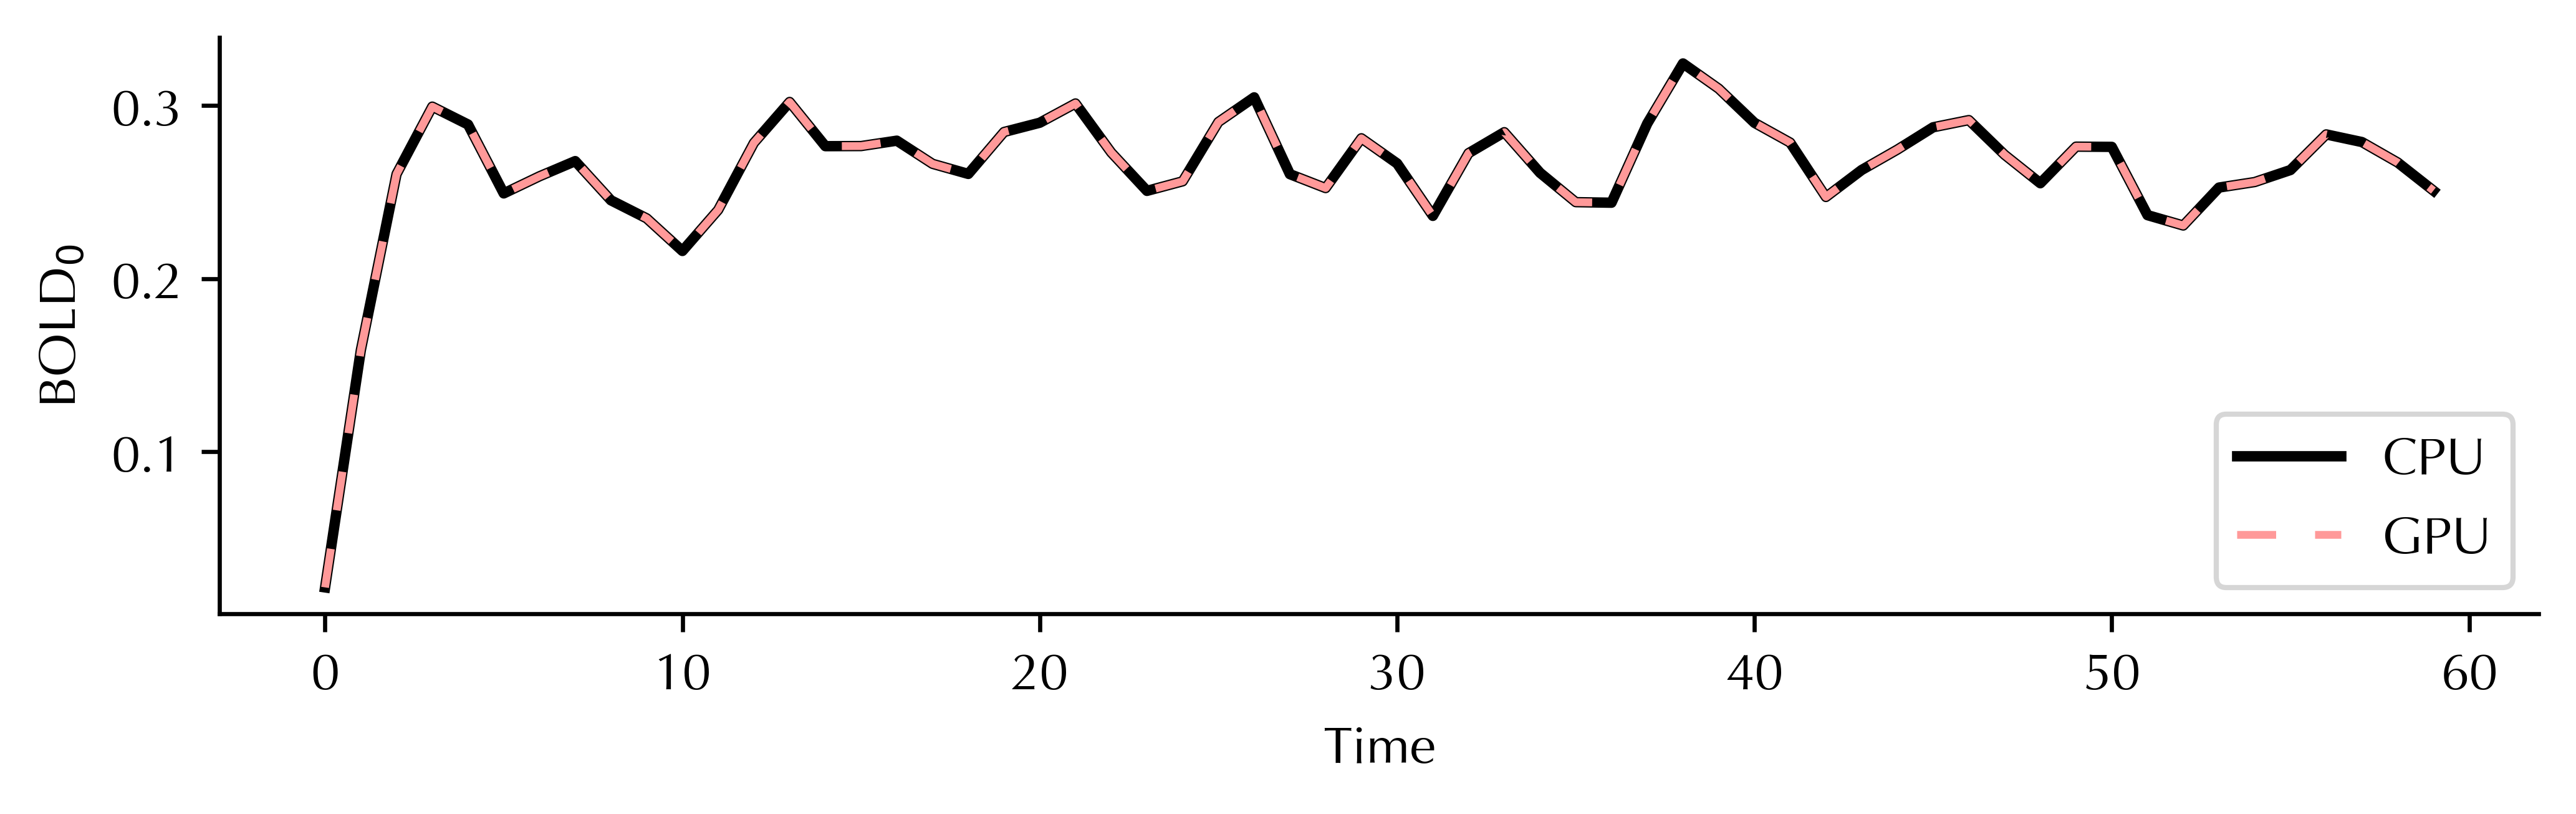

In [10]:
fig, ax = plt.subplots(figsize=(8, 2.0))

ax.plot(
    grids['cpu'].problem.sim_group.sim_bold[100, :, 0],
    ls='-',
    label='CPU',
    color='black',
    linewidth=2,
)
ax.plot(
    grids['gpu'].problem.sim_group.sim_bold[100, :, 0],
    ls='--',
    dashes=(5, 5),
    color=(1.0, 0.6, 0.6),
    label='GPU',
)

ax.set_ylabel(r'BOLD$_0$')
ax.set_xlabel('Time')

sns.despine()

ax.legend()
fig.savefig('S_cpu_gpu_identity_bold.png', transparent=True, bbox_inches='tight')